In [1]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

# This method applies noise to measurement and gates with prob. p_meas and p_gate, resectively 
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

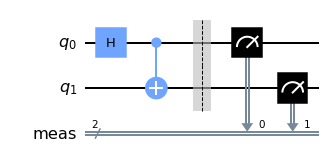

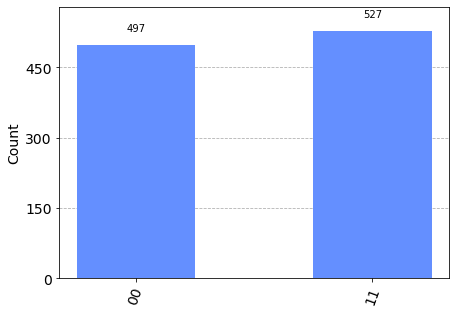

In [43]:

##### Complete this part 
### create circuit with 3 qubits: each qubit  
### start #####

circuit = QuantumCircuit(2)
circuit.h(0)  
circuit.cx(0, 1)  

##### end ####

circuit.measure_all() # measure the qubits
display(circuit.draw(output='mpl'))

qobj = assemble(circuit)
counts = aer_sim.run(qobj).result().get_counts()

plot_histogram(counts)


## Without Noise

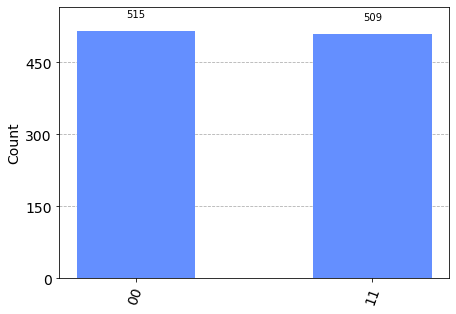

In [53]:
# Apply noise to cicuit. Note that to reset the noise caused by this method 
# you need to execute the method with probs 0.0 (Don't just comment it)
### Change the parameters in the line below and obaswer 
noise_model = get_noise(0,0)

# run the circuit with th noise model and extract the counts
qobj = assemble(circuit)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)


## With Noise

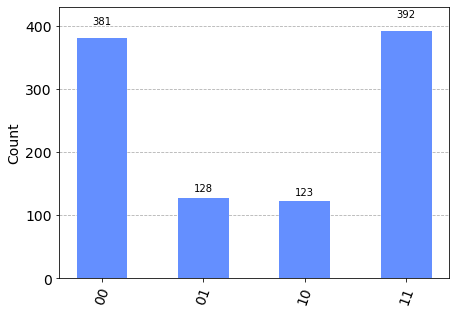

In [59]:
# Apply noise to cicuit. Note that to reset the noise caused by this method 
# you need to execute the method with probs 0.0 (Don't just comment it)
### Change the parameters in the line below and obaswer 
noise_model = get_noise(0.1,0.1)

# run the circuit with th noise model and extract the counts
qobj = assemble(circuit)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)
